In [1]:
from __future__ import print_function
import numpy as np 
import time
import plaidml.keras 
plaidml.keras.install_backend()
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 7
epochs = 15

# input image dimensions
img_rows, img_cols = 48, 48

# the data, split between train and test sets

with open("./data/fer2013/fer2013.csv") as f:
    content = f.readlines()
 
    lines = np.array(content)
 
num_of_instances = lines.size
print("number of instances: ",num_of_instances)

x_train, y_train, x_test, y_test = [], [], [], []
 
for i in range(1,num_of_instances):
 try:
  emotion, img, usage = lines[i].split(",")
   
  val = img.split(" ")
  pixels = np.array(val, 'float32')
 
  emotion = keras.utils.np_utils.to_categorical(emotion, 7)
 
  if 'Training' in usage:
   y_train.append(emotion)
   x_train.append(pixels)
  elif 'PublicTest' in usage:
   y_test.append(emotion)
   x_test.append(pixels)
 except:
  print("", end="")
/
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
#y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)

number of instances:  35888
(28709, 2304)
(3589, 2304)
(28709, 1, 7)
(3589, 1, 7)
x_train shape: (28709, 48, 48, 1)
y_train shape: (28709, 1, 7)
28709 train samples
3589 test samples


In [2]:
from numpy.random import seed
seed(1)

In [3]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
y_train = y_train.reshape(len(x_train),7)
y_test = y_test.reshape(len(x_test),7)
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))ss
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=512,
          epochs=100,
          verbose=1)

INFO:plaidml:Opening device "amd_radeon_pro_455_compute_engine.0"


x_train shape: (28709, 48, 48, 1)
y_train shape: (28709, 1, 7)
Epoch 1/100


INFO:plaidml:Analyzing Ops: 135 of 454 operations complete


28672/28709 [============================>.] - ETA: 0s - loss: 1.8575 - acc: 0.2217

INFO:plaidml:Analyzing Ops: 153 of 454 operations complete


28709/28709 [==============================] - 128s - loss: 1.8575 - acc: 0.2217   
Epoch 2/100
28709/28709 [==============================] - 115s - loss: 1.8336 - acc: 0.2376   
Epoch 3/100
28709/28709 [==============================] - 116s - loss: 1.8072 - acc: 0.2414   
Epoch 4/100
28709/28709 [==============================] - 116s - loss: 1.7497 - acc: 0.2806   
Epoch 5/100
28709/28709 [==============================] - 124s - loss: 1.6383 - acc: 0.3526   
Epoch 6/100
28709/28709 [==============================] - 119s - loss: 1.5385 - acc: 0.4002   
Epoch 7/100
28709/28709 [==============================] - 117s - loss: 1.4733 - acc: 0.4314   
Epoch 8/100
28709/28709 [==============================] - 116s - loss: 1.4204 - acc: 0.4560   
Epoch 9/100
28709/28709 [==============================] - 116s - loss: 1.3781 - acc: 0.4714   
Epoch 10/100
28709/28709 [==============================] - 117s - loss: 1.3274 - acc: 0.4937   
Epoch 11/100
28709/28709 [=========================

28709/28709 [==============================] - 115s - loss: 0.4030 - acc: 0.8495   
Epoch 86/100
28709/28709 [==============================] - 115s - loss: 0.4211 - acc: 0.8426   
Epoch 87/100
28709/28709 [==============================] - 115s - loss: 0.4437 - acc: 0.8348   
Epoch 88/100
28709/28709 [==============================] - 115s - loss: 0.4187 - acc: 0.8446   
Epoch 89/100
28709/28709 [==============================] - 115s - loss: 0.3945 - acc: 0.8516   
Epoch 90/100
28709/28709 [==============================] - 115s - loss: 0.3825 - acc: 0.8569   
Epoch 91/100
28709/28709 [==============================] - 115s - loss: 0.4027 - acc: 0.8502   
Epoch 92/100
28709/28709 [==============================] - 114s - loss: 0.3872 - acc: 0.8560   
Epoch 93/100
28709/28709 [==============================] - 115s - loss: 0.3728 - acc: 0.8605   
Epoch 94/100
28709/28709 [==============================] - 115s - loss: 0.3792 - acc: 0.8591   
Epoch 95/100
28709/28709 [=================

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.49991396202
Test accuracy: 0.563388130407


In [11]:
from keras.preprocessing import image

Populating the interactive namespace from numpy and matplotlib


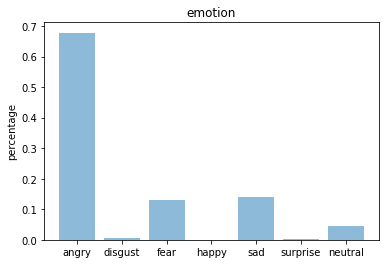

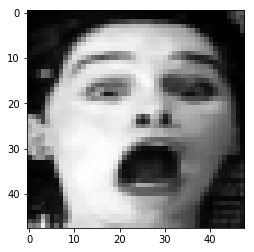

In [33]:
import matplotlib.pyplot as plt
%pylab inline
img = image.load_img("/Users/karthik/Documents/Screen Shot 2018-05-14 at 12.12.57 AM.png", grayscale=True, target_size=(48, 48))
 
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
 
x /= 255
 
custom = model.predict(x)
emotion_analysis(custom[0])
 
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
 
plt.gray()
plt.imshow(x)
plt.show()

In [6]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()



In [55]:
model.save_weights("model_100_epoch_512.h5")
print("Saved model to disk")

Saved model to disk


In [56]:
model_json = model.to_json()
with open("model_100_epoch_512.json", "w") as json_file:
    json_file.write(model_json)